In [1]:
import qiskit as qsk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!python -m pip install -U scikit-image

In [3]:
import skimage
from skimage.transform import resize
bottle_resized = resize(np.random.sample((28,28)), (16, 16))

In [4]:
import encoder

In [5]:
circuit = encoder.encode(np.random.sample((28,28)))

TypeError: rx() missing 1 required positional argument: 'qubit'

[[1 0]
 [0 0]]


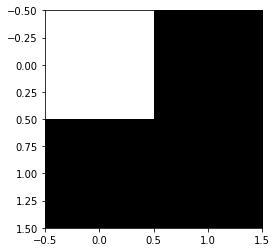

In [6]:
#image = np.array([[1.5,0.5],[0.3,0.8]])
image = np.array([[1,0],[0,0]])
print(image)
plt.imshow(image, cmap = "gray")

In [7]:
circuit = qsk.QuantumCircuit(2,2)
circuit.rx(image[0][0],0) #pixel (0,0)
circuit.crx(image[1][0],0,1) #pixel (1,0)
circuit.crx(image[0][1],1,0) #pixel (0,1)
circuit.rx(image[1][1],1) # pixel(1,1)

In [8]:
def make_circuit(n,image):
    circuit = qsk.QuantumCircuit(n,n)
    for i in range(n):
        for j in range(n):
            if i == j:
                circuit.rx(image[i][i],i)
            else:
                circuit.crx(image[i][j],i,j) #pixel (1,0)
    return(circuit)

image = np.random.sample((16,16))
circuit = make_circuit(16,image)

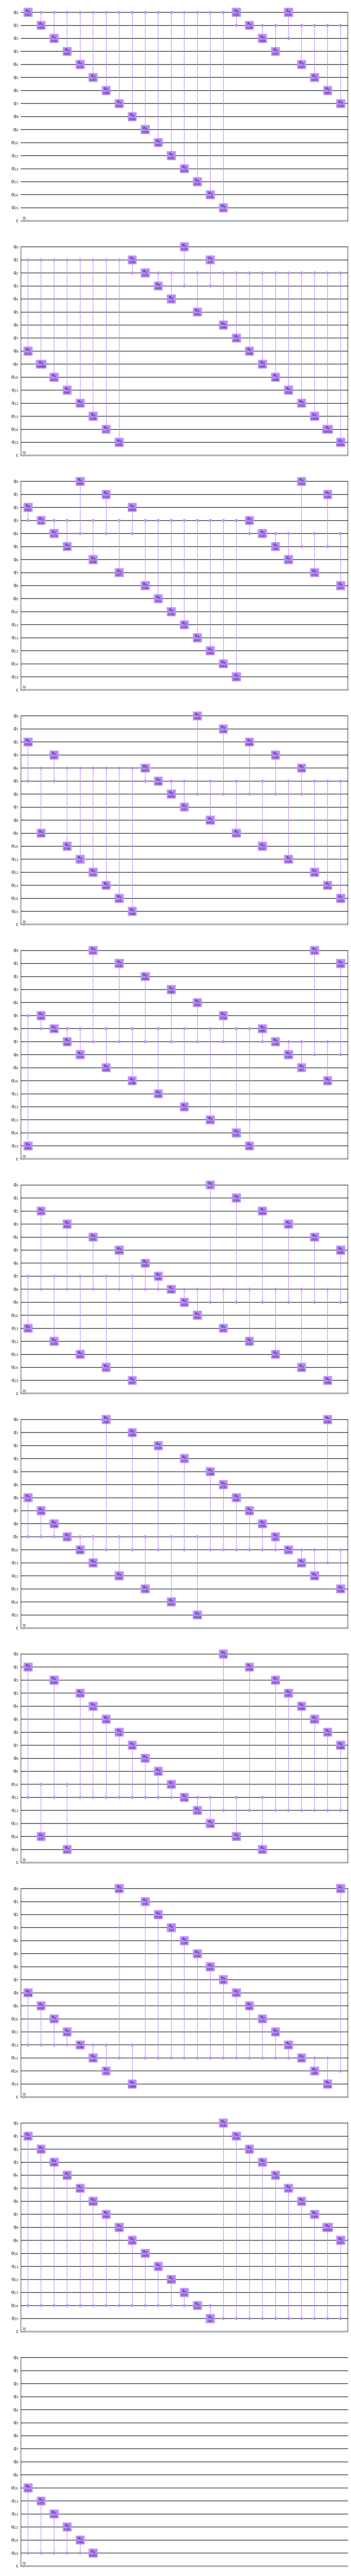

In [9]:
%matplotlib inline
circuit.draw(output='mpl')

In [10]:
circuit.depth()

207

In [11]:
2**13

8192

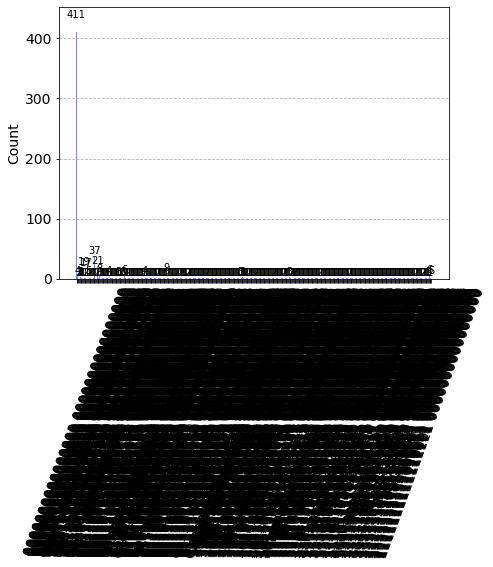

In [12]:
circuit.measure_all()
simulator = qsk.Aer.get_backend('qasm_simulator')
result = qsk.execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [13]:
result.get_counts()
values = [0,0,0,0]


In [17]:
def encode(image):
    circuit = qsk.QuantumCircuit(2,2)
    circuit.ry(np.pi/4,0)
    circuit.ry(np.pi/4,1)
    circuit.rx(image[0][0]*np.pi/4,0) #pixel (0,0)
    circuit.crx(image[1][0]*3*np.pi/4,0,1) #pixel (1,0)
    circuit.crx(image[0][1]*2*np.pi/4,1,0) #pixel (0,1)
    circuit.rx(image[1][1]*4*np.pi/4,1)
    return(circuit)

def distribution(circuit):
    circuit.measure_all()
    simulator = qsk.Aer.get_backend('qasm_simulator')
    result = qsk.execute(circuit, backend=simulator, shots=16384).result()
    counts = result.get_counts()
    dist = [0,0,0,0]
    i = 0
    for key in ['10 00', '11 00', '01 00', '00 00']:
        try:
            dist[i] = counts[key]/16384
            i += 1
        except:
            i += 1
    return(dist)

image = np.array([[1,1],[0,0]])
print(distribution(encode(image)))

[0.034423828125, 0.10723876953125, 0.21368408203125, 0.6446533203125]


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()

      # First fully connected layer
      self.fc1 = nn.Linear(4, 8)
      # Second fully connected layer that outputs our 10 labels
      self.fc2 = nn.Linear(8, 8)
      self.fc3 = nn.Linear(8, 4)

my_nn = Net()
print(my_nn)

Net(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=4, bias=True)
)


In [34]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(4, 8)
      self.fc2 = nn.Linear(8, 8)
      self.fc3 = nn.Linear(8, 4)

    # x represents our data
    def forward(self, x):
      # Pass data through fc1
      x = self.fc1(x)
      x = F.sigmoid(x)
      x = self.fc2(x)
      x = F.sigmoid(x)
      x = self.fc3(x)


      # Apply softmax to x
      #output = F.log_softmax(x, dim=1)
      return x#output

In [35]:
# Equates to one random 28x28 image
random_data = torch.rand(4)

my_nn = Net()
result = my_nn(random_data)
print (result)

tensor([ 0.1844, -0.0648,  0.5009,  0.3099], grad_fn=<AddBackward0>)


/opt/.qbraid/environments/qbraid_000000/pyenv/lib/python3.9/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

In [37]:
import numpy as np
import pandas as pd

In [137]:
ims = [np.array([0,0,0,0]),
       np.array([0,0,0,1]),
       np.array([0,0,1,0]),
       np.array([0,0,1,1]),
       np.array([0,1,0,0]),
       np.array([0,1,0,1]),
       np.array([0,1,1,0]),
       np.array([0,1,1,1]),
       np.array([1,0,0,0]),
       np.array([1,0,0,1]),
       np.array([1,0,1,0]),
       np.array([1,0,1,1]),
       np.array([1,1,0,0]),
       np.array([1,1,0,1]),
       np.array([1,1,1,0]),
       np.array([1,1,1,1])]
for im in ims:
    print(im, distribution(encode(im.reshape(2,2))), convert_label(im))

[0 0 0 0] [0.12603759765625, 0.02215576171875, 0.12353515625, 0.728271484375] 0
[0 0 0 1] [0.72271728515625, 0.1285400390625, 0.02142333984375, 0.1273193359375] 1
[0 0 1 0] [0.1234130859375, 0.10894775390625, 0.03582763671875, 0.7318115234375] 2
[0 0 1 1] [0.7354736328125, 0.03619384765625, 0.10382080078125, 0.12451171875] 3
[0 1 0 0] [0.07330322265625, 0.07354736328125, 0.12847900390625, 0.72467041015625] 4
[0 1 0 1] [0.732666015625, 0.12298583984375, 0.0726318359375, 0.07171630859375] 5
[0 1 1 0] [0.0029296875, 0.2298583984375, 0.032958984375, 0.7342529296875] 6
[0 1 1 1] [0.73358154296875, 0.03778076171875, 0.2265625, 0.0020751953125] 7
[1 0 0 0] [0.10833740234375, 0.03631591796875, 0.21478271484375, 0.64056396484375] 8
[1 0 0 1] [0.6387939453125, 0.21539306640625, 0.03778076171875, 0.1080322265625] 9
[1 0 1 0] [0.109375, 0.18365478515625, 0.0660400390625, 0.64093017578125] 10
[1 0 1 1] [0.642822265625, 0.0628662109375, 0.18524169921875, 0.10906982421875] 11
[1 1 0 0] [0.03833007812

In [139]:
(14*14-14)*2

364

In [140]:
0.999**364

0.6947646516921666

In [48]:
#generate training data shape
image_size = 2
nb_sample = 2000
train_df = pd.DataFrame()
f_images = []
#train_images = np.random.sample((nb_sample,1,image_size**2))
train_images = np.random.randint(2, size=(nb_sample,1,image_size**2))
encoded = []
for im in train_images:
    encoded.append(distribution(encode(im.reshape(2,2))))
encoded = np.array(labels)


class MyDataset():
 
  def __init__(self):
 
    x=encoded
    y=train_images
 
    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.tensor(y,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

In [49]:
from torch.utils.data import DataLoader
myDs=MyDataset()
train_loader= DataLoader(myDs,batch_size=2000,shuffle=False)

In [144]:
2**256

115792089237316195423570985008687907853269984665640564039457584007913129639936

In [50]:
for k in range(10):
    print(myDs.__getitem__(k))

(tensor([0.7286, 0.0364, 0.1096, 0.1254]), tensor([[1., 0., 1., 1.]]))
(tensor([0.0185, 0.2701, 0.0634, 0.6480]), tensor([[0., 1., 1., 0.]]))
(tensor([0.1100, 0.0363, 0.2127, 0.6410]), tensor([[0., 1., 0., 1.]]))
(tensor([0.0349, 0.1107, 0.2079, 0.6465]), tensor([[0., 0., 1., 1.]]))
(tensor([0.1248, 0.0219, 0.1240, 0.7294]), tensor([[0., 1., 1., 0.]]))
(tensor([0.0186, 0.2767, 0.0630, 0.6417]), tensor([[0., 0., 1., 1.]]))
(tensor([0.0213, 0.2809, 0.0627, 0.6351]), tensor([[1., 0., 0., 0.]]))
(tensor([0.1248, 0.0215, 0.1256, 0.7280]), tensor([[1., 0., 0., 0.]]))
(tensor([0.0016, 0.2294, 0.0369, 0.7321]), tensor([[1., 0., 1., 1.]]))
(tensor([0.0753, 0.0728, 0.1236, 0.7283]), tensor([[0., 0., 0., 0.]]))


In [51]:
import torch.optim as optim
my_nn = Net()
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.SGD(my_nn.parameters(), lr=0.0000001, momentum=0.99)

In [52]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = my_nn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 0:    # print every 500 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0

print('Finished Training')

/opt/.qbraid/environments/qbraid_000000/pyenv/lib/python3.9/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/opt/.qbraid/environments/qbraid_000000/pyenv/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2000, 1, 4])) that is different to the input size (torch.Size([2000, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1,     1] loss: 25105.180
[2,     1] loss: 47976.176
[3,     1] loss: 8123.726
[4,     1] loss: 23976.716
[5,     1] loss: 14474.824
[6,     1] loss: 9406.123
[7,     1] loss: 22419.222
[8,     1] loss: 19060.712
[9,     1] loss: 8062.573
[10,     1] loss: 17372.050
[11,     1] loss: 22703.138
[12,     1] loss: 10380.330
[13,     1] loss: 11891.717
[14,     1] loss: 22901.276
[15,     1] loss: 15009.991
[16,     1] loss: 8480.014
[17,     1] loss: 19711.236
[18,     1] loss: 19592.128
[19,     1] loss: 8464.873
[20,     1] loss: 14670.371
[21,     1] loss: 21893.154
[22,     1] loss: 11556.924
[23,     1] loss: 10127.346
[24,     1] loss: 20886.708
[25,     1] loss: 16044.966
[26,     1] loss: 8055.969
[27,     1] loss: 17134.066
[28,     1] loss: 19674.394
[29,     1] loss: 9175.640
[30,     1] loss: 12438.992
[31,     1] loss: 20723.164
[32,     1] loss: 12689.508
[33,     1] loss: 8938.198
[34,     1] loss: 18766.796
[35,     1] loss: 16742.170
[36,     1] loss: 8093.495
[37,     1

In [43]:
criteriondom_data = torch.rand(4)
random_data = torch.FloatTensor([1,0,1,1])
result = my_nn(random_data)
print("input", random_data)
print("output", result)

input tensor([1., 0., 1., 1.])
output tensor([0.3204, 0.0182, 0.1109, 0.5909], grad_fn=<AddBackward0>)


In [ ]:
criterion(torch.FloatTensor([0.5080, 0.4769, 0.5234, 0.5126]), random_data)

In [15]:
sum(p.numel() for p in my_nn.parameters() if p.requires_grad)

NameError: name 'my_nn' is not defined

In [131]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def convert_label(label):
    new_label = 0
    i = 3
    for bit in label:
        new_label += bit*(2**i)
        i -= 1
    return(new_label)
new_labels = [convert_label(l) for l in train_images.reshape(2000,4)]

X,y = encoded, new_labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4
)
#regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)
regr_rf = RandomForestClassifier()
regr_rf.fit(X_train, y_train)
regr_rf.predict(X_train[[0]])

array([2])

In [132]:
0.999**480

0.6186348025557713

In [133]:
convert_label([1,0,0,1])

9

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
            'prec': 'precision'}

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),
            'prec': 'precision'}
y_pred = regr_rf.predict(X_test)
y_pred = [round(y) for y in y_pred]
accuracy_score(y_test, y_pred)

0.04

In [136]:
y_pred

[9,
 5,
 10,
 15,
 7,
 8,
 11,
 9,
 8,
 9,
 2,
 11,
 12,
 5,
 12,
 9,
 10,
 9,
 2,
 7,
 14,
 3,
 10,
 15,
 10,
 12,
 6,
 10,
 15,
 9,
 9,
 2,
 3,
 8,
 4,
 14,
 10,
 7,
 7,
 0,
 4,
 4,
 11,
 2,
 7,
 9,
 8,
 15,
 2,
 2,
 3,
 5,
 12,
 3,
 5,
 10,
 3,
 0,
 3,
 3,
 11,
 10,
 11,
 10,
 15,
 9,
 0,
 5,
 7,
 7,
 10,
 12,
 6,
 11,
 9,
 7,
 10,
 13,
 12,
 8,
 9,
 12,
 12,
 14,
 5,
 13,
 6,
 5,
 12,
 9,
 9,
 4,
 2,
 12,
 3,
 10,
 10,
 9,
 13,
 9,
 10,
 8,
 9,
 12,
 11,
 3,
 15,
 10,
 14,
 8,
 7,
 11,
 0,
 12,
 14,
 9,
 4,
 1,
 10,
 5,
 7,
 7,
 6,
 12,
 0,
 10,
 4,
 13,
 10,
 10,
 4,
 8,
 5,
 2,
 9,
 7,
 5,
 7,
 5,
 1,
 12,
 8,
 9,
 10,
 2,
 3,
 11,
 7,
 3,
 0,
 12,
 6,
 11,
 9,
 7,
 3,
 9,
 3,
 3,
 7,
 1,
 8,
 2,
 10,
 0,
 13,
 10,
 14,
 13,
 2,
 1,
 12,
 3,
 10,
 12,
 0,
 1,
 7,
 0,
 0,
 13,
 0,
 12,
 0,
 10,
 12,
 9,
 8,
 1,
 12,
 10,
 3,
 11,
 0,
 4,
 12,
 14,
 10,
 0,
 10]

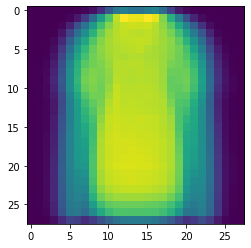

In [23]:
mean_img = images.mean(axis = 0)
plt.imshow(mean_img)
plt.show()
np.save("mean_img", mean_img)

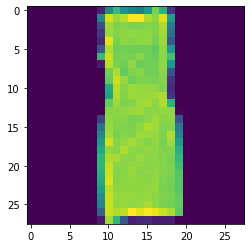

In [9]:
#load the actual hackthon data (fashion-mnist)
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
#you can visualize it
import matplotlib.pyplot as plt
plt.imshow(images[1100])

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from skimage.transform import resize
algorithm_globals.random_seed = 42

In [12]:
qc = QuantumCircuit(4)
feature_map = ZZFeatureMap(4)
qc.compose(feature_map, inplace=True)

In [13]:
qc.draw()

┌────────────────────────────────────┐
q_0: ┤0                                   ├
     │                                    │
q_1: ┤1                                   ├
     │  ZZFeatureMap(x[0],x[1],x[2],x[3]) │
q_2: ┤2                                   ├
     │                                    │
q_3: ┤3                                   ├
     └────────────────────────────────────┘

In [18]:
def encode(im):
    heigth = 4
    length = 1
    size_ = heigth * length
    im = im[:,3:8] * 255
    im = resize(im,(heigth,length))
    qc = QuantumCircuit(size_)
    for i in range(heigth):
        qc.rx(im[i][0]*np.pi,i)
    return(qc)

In [19]:
encode(images[0]).draw()

┌────────────┐
q_0: ─┤ Rx(1.4708) ├
      ├────────────┤
q_1: ─┤ Rx(1.3063) ├
      └┬──────────┬┘
q_2: ──┤ Rx(0.18) ├─
     ┌─┴──────────┴┐
q_3: ┤ Rx(0.16266) ├
     └─────────────┘